In [1]:
import bilby
from bilby.core.utils import random
import pprint
import numpy as np
from copy import deepcopy
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Sets seed of bilby's generator "rng" to "123" to ensure reproducibility
random.seed(123)

# Specify the output directory and the name of the simulation.
outdir = "outdir"
label = "bns_example"
bilby.core.utils.setup_logger(outdir=outdir, label=label)

injection_parameters = dict(
    mass_1=1.5,
    mass_2=1.3,
    chi_1=0.02,
    chi_2=0.02,
    luminosity_distance=50.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
    lambda_1=545,
    lambda_2=1346,
)

duration = 32
sampling_frequency = 2048
start_time = injection_parameters["geocent_time"] + 2 - duration

waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2_NRTidal",
    reference_frequency=50.0,
    minimum_frequency=40.0,
    fiducial=1
)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star_relative_binning,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments,
)

interferometers = bilby.gw.detector.InterferometerList(["CE"])
for interferometer in interferometers:
    interferometer.minimum_frequency = 40
interferometers.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration, start_time=start_time
)
interferometers.inject_signal(
    parameters=injection_parameters, waveform_generator=waveform_generator
)

priors = bilby.gw.prior.BNSPriorDict()
for key in [
    "psi",
    "geocent_time",
    "ra",
    "dec",
    "chi_1",
    "chi_2",
    "theta_jn",
    "luminosity_distance",
    "phase",
]:
    priors[key] = injection_parameters[key]
del priors["mass_ratio"], priors["lambda_1"], priors["lambda_2"]

priors["chirp_mass"] = bilby.core.prior.Gaussian(1.215, 0.1, name="chirp_mass", unit="$M_{\\odot}$")
priors["symmetric_mass_ratio"] = bilby.core.prior.Uniform(0.1, 0.25, name="symmetric_mass_ratio")
priors["lambda_tilde"] = bilby.core.prior.Uniform(500, 1000, name="lambda_tilde")
priors["delta_lambda_tilde"] = bilby.core.prior.Uniform(0, 200, name="delta_lambda_tilde")

m1 = injection_parameters["mass_1"]
m2 = injection_parameters["mass_2"]
l1, l2 = injection_parameters["lambda_1"], injection_parameters["lambda_2"]

# priors["chirp_mass"] = bilby.gw.conversion.component_masses_to_chirp_mass(m1, m2)
# priors["symmetric_mass_ratio"] = bilby.gw.conversion.component_masses_to_symmetric_mass_ratio(m1, m2)
# priors["lambda_tilde"] = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(l1, l2, m1, m2)
# priors["delta_lambda_tilde"] = bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(l1, l2, m1, m2)

priors["lambda_1"] = bilby.core.prior.Constraint(name="lambda_1", minimum=0, maximum=10000)
priors["lambda_2"] = bilby.core.prior.Constraint(name="lambda_2", minimum=0, maximum=10000)

# fiducial params
fiducial_parameters = injection_parameters.copy()
m1 = fiducial_parameters.pop("mass_1")
m2 = fiducial_parameters.pop("mass_2")
lambda_1 = fiducial_parameters.pop("lambda_1")
lambda_2 = fiducial_parameters.pop("lambda_2")

fiducial_parameters["chirp_mass"] = bilby.gw.conversion.component_masses_to_chirp_mass(m1, m2)
fiducial_parameters["symmetric_mass_ratio"] = bilby.gw.conversion.component_masses_to_symmetric_mass_ratio(m1, m2)
fiducial_parameters["lambda_tilde"] = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(lambda_1, lambda_2, m1, m2)
fiducial_parameters["delta_lambda_tilde"] = bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(lambda_1, lambda_2, m1, m2)

likelihood = bilby.gw.likelihood.RelativeBinningGravitationalWaveTransient(
    interferometers=interferometers,
    waveform_generator=waveform_generator,
    priors=priors,
    # distance_marginalization=True,
    fiducial_parameters=fiducial_parameters,
)


21:43 bilby INFO    : Waveform generator instantiated: WaveformGenerator(duration=32, sampling_frequency=2048, start_time=0, frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star_relative_binning, time_domain_source_model=None, parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters, waveform_arguments={'waveform_approximant': 'IMRPhenomPv2_NRTidal', 'reference_frequency': 50.0, 'minimum_frequency': 40.0, 'fiducial': 1})
/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
J

21:43 bilby INFO    : Running for label 'bns_example', output will be saved to 'outdir'
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21:43 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
21

it=  2883 logz=429771.0010156000052504760255204420248704468581108159154915854115511802457988908195786371375080447864043704443832883878176942523235360430575644792184786706982848387200926575803737830233794788090059368953234970799945081119038967640880074652742780142494579258788820056842838115669472196386865459400540160.000000


21:50 bilby INFO    : Sampling time: 0:07:42.007898
21:50 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
21:50 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/2984 [00:00<?, ?it/s]

21:50 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/2984 [00:00<?, ?it/s]

21:50 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
21:50 bilby INFO    : Summary of results:
nsamples: 2984
ln_noise_evidence: -461356.719
ln_evidence: -31585.356 +/-  0.515
ln_bayes_factor: 429771.364 +/-  0.515



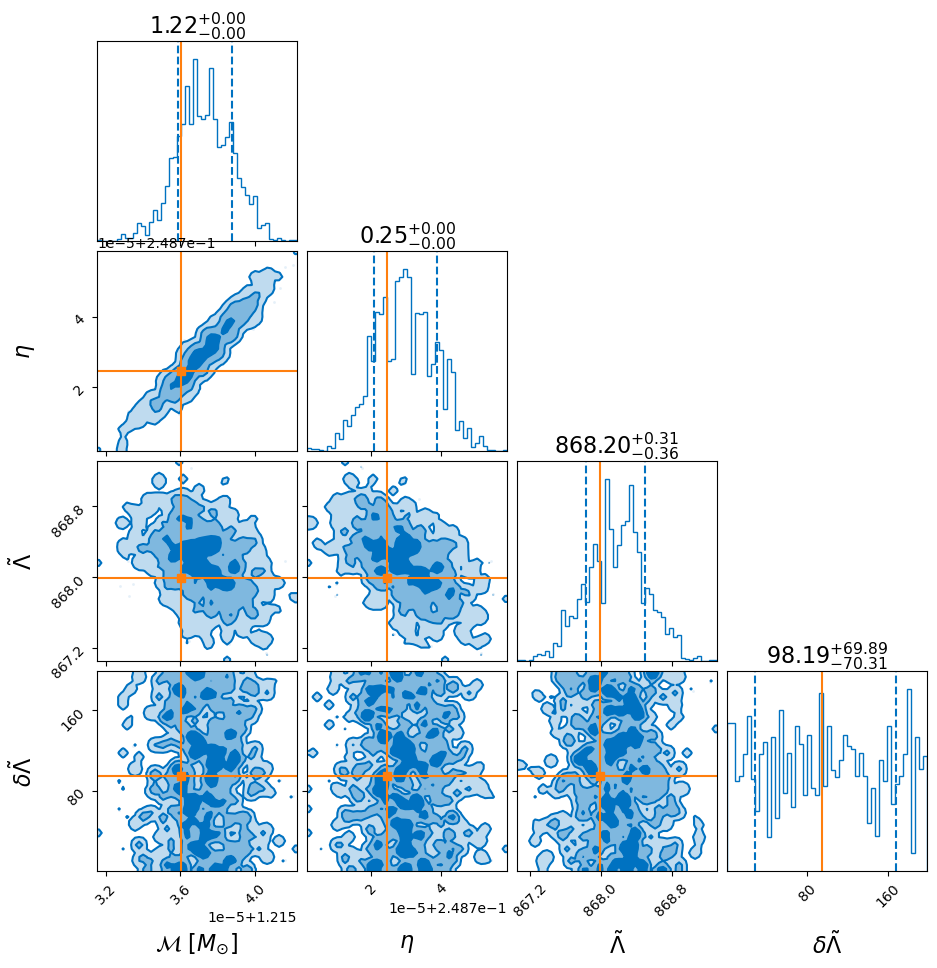

In [3]:

# Run sampler.  In this case we're going to use the `nestle` sampler
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="nestle",
    npoints=100,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    conversion_function=bilby.gw.conversion.generate_all_bns_parameters,
    result_class=bilby.gw.result.CBCResult,
)

result.plot_corner()

In [4]:
print(bilby.gw.conversion.component_masses_to_chirp_mass(m1, m2))
print(bilby.gw.conversion.component_masses_to_symmetric_mass_ratio(m1, m2))
print(bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(lambda_1, lambda_2, m1, m2))
print(bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(lambda_1, lambda_2, m1, m2))

1.2150360414642816
0.24872448979591844
867.9931562541493
95.05130053992274


21:50 bilby INFO    : Waveform generator instantiated: WaveformGenerator(duration=32, sampling_frequency=2048, start_time=0, frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star, time_domain_source_model=None, parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters, waveform_arguments={'waveform_approximant': 'IMRPhenomPv2_NRTidal', 'reference_frequency': 50.0, 'minimum_frequency': 40.0})


  0%|          | 0/2984 [00:00<?, ?it/s]

Reweighting efficiency is 100.00%
Binned vs unbinned log Bayes factor -0.00


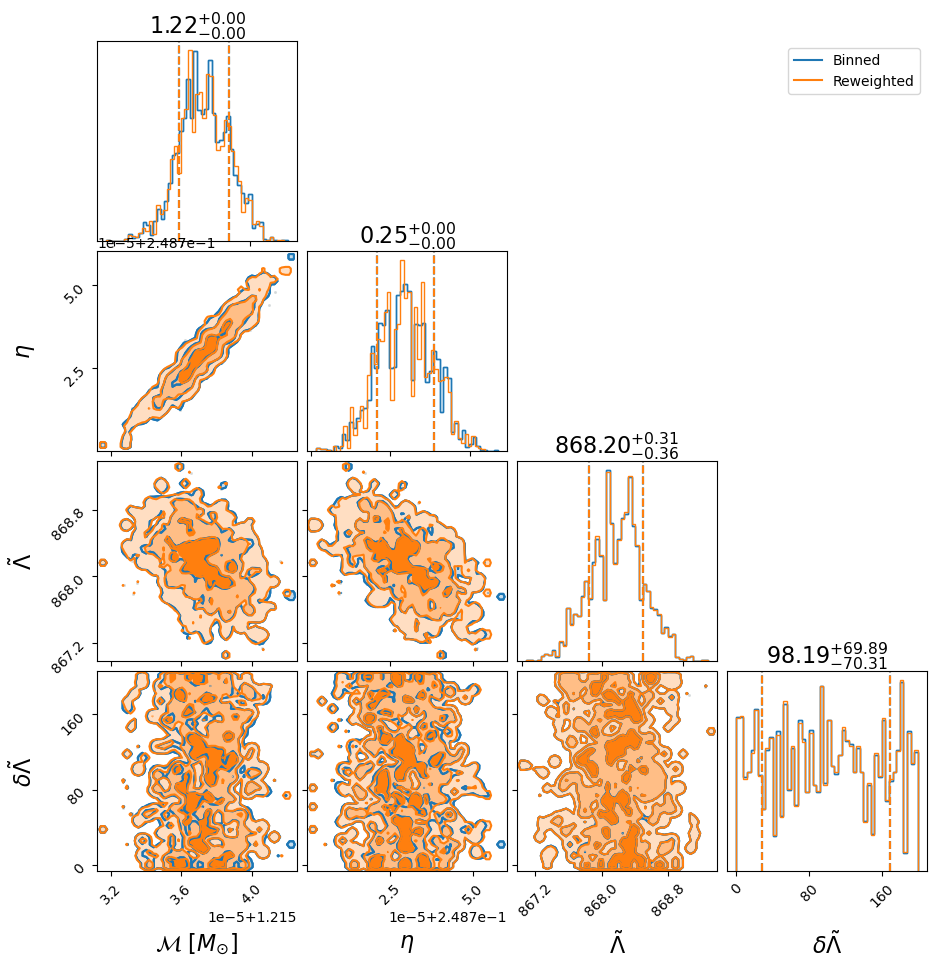

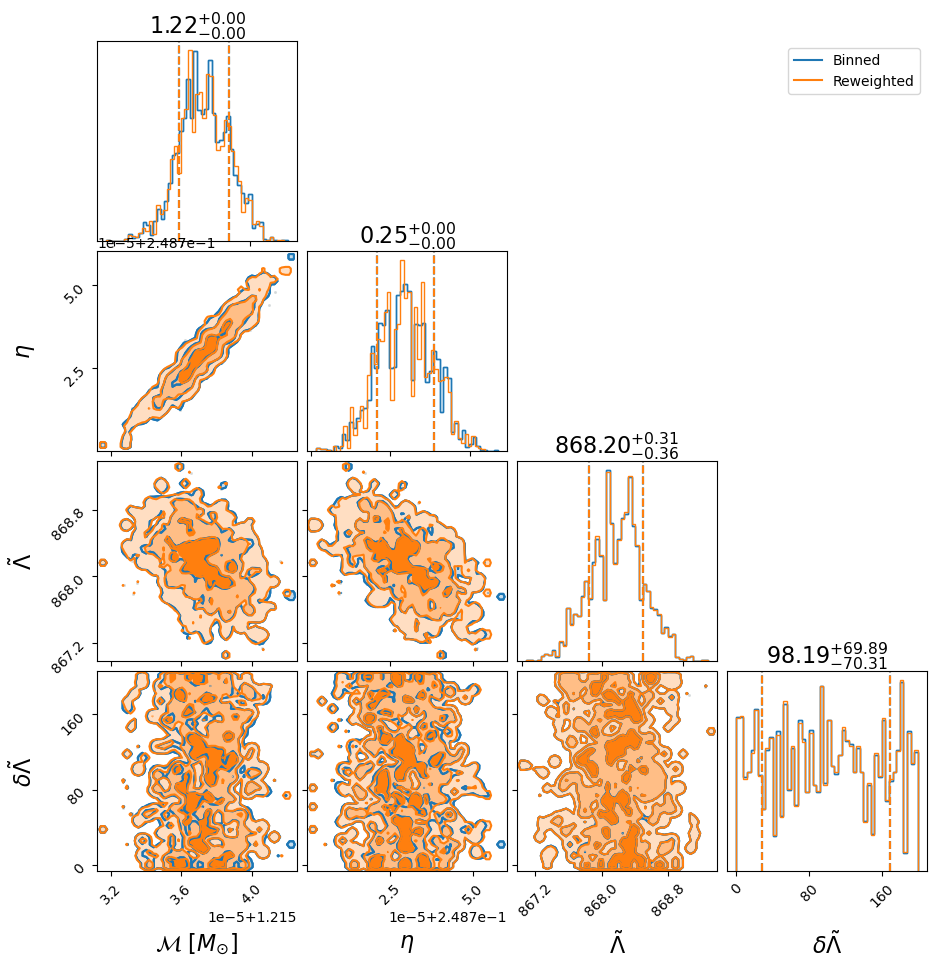

In [5]:

alt_waveform_arguments = deepcopy(waveform_arguments)
del alt_waveform_arguments["frequency_bin_edges"], alt_waveform_arguments["fiducial"]

alt_waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=alt_waveform_arguments,
)
alt_likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=interferometers,
    waveform_generator=alt_waveform_generator,
)

weights = list()
for parameters in tqdm(result.posterior.to_dict(orient="records")):
    weights.append(
        alt_likelihood.log_likelihood_ratio(parameters)
        - likelihood.log_likelihood_ratio(parameters)
    )
weights = np.exp(weights)
print(
    f"Reweighting efficiency is {np.mean(weights)**2 / np.mean(weights**2) * 100:.2f}%"
)
print(f"Binned vs unbinned log Bayes factor {np.log(np.mean(weights)):.2f}")

# Generate result object with the posterior for the regular likelihood using
# rejection sampling
alt_result = deepcopy(result)
keep = weights > random.rng.uniform(0, max(weights), len(weights))
alt_result.posterior = result.posterior.iloc[keep]

# Make a comparison corner plot.
bilby.core.result.plot_multiple(
    [result, alt_result],
    labels=["Binned", "Reweighted"],
    filename=f"{outdir}/{label}_corner.png",
)

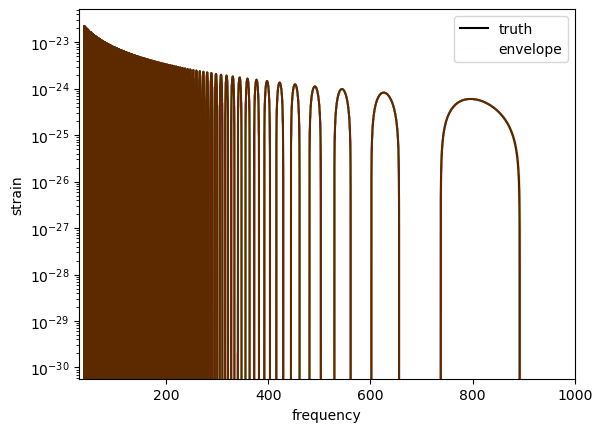

In [9]:
fig, ax = plt.subplots()

# ax.plot(alt_waveform_generator.frequency_array, interferometers[0].frequency_domain_strain, "r", label="noisy data")
ax.plot(alt_waveform_generator.frequency_array, alt_waveform_generator.frequency_domain_strain(injection_parameters)['plus'], "k", label="truth")

for j,i in enumerate(np.random.choice(len(result.posterior), 50, replace=False)):
    sample = result.posterior.iloc[i]
    converted_sample, _ = bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters(sample)
    sample_params = {key: converted_sample[key] for key in injection_parameters}

    ax.plot(alt_waveform_generator.frequency_array, alt_waveform_generator.frequency_domain_strain(sample_params)['plus'], color='C1', alpha=0.01, label="envelope" if j==0 else None)

ax.set_xlim(30, 1000)
# ax.set_ylim(-1.5e-20, 1.5e-20)
ax.set_xlabel("frequency")
ax.set_ylabel("strain")
ax.set_yscale('log')
ax.legend()
